In [67]:
import pandas as pd
from sklearn import datasets

data = datasets.load_breast_cancer()
feature_names = data.feature_names

df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target

# df = pd.read_csv("wine_normalized.csv")

X = df.drop(columns=['target'])
y = df['target']

In [68]:
from sklearn.model_selection import train_test_split

random_state = 12
train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=train_size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=random_state, train_size=train_size)

### Choosing hyperparameters

In [69]:
def accuracy(y_predicted, y_real):
    correct = 0
    for i in range(len(y_predicted)):
        if y_predicted[i] == y_real[i]:
            correct += 1
    return correct / len(y_predicted)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

prediction = KNeighborsClassifier().fit(X_train, y_train).predict(X_test)
accuracy(y_test.to_list(), prediction)

0.9122807017543859

In [71]:
from knn import KNNClassifier

prediction = KNNClassifier().fit(X_train, y_train).predict(X_test)
accuracy(y_test.to_list(), prediction)

0.9122807017543859

In [72]:
def optimize_my_knn(window_type, trial):
    window_size = trial.suggest_float("window_size", 0.01, 1) if window_type == "fixed" else trial.suggest_int(
        "window_size", 1, 100)

    prediction = KNNClassifier(
        window_size=window_size,
        window_type=window_type,
        kernel=trial.suggest_categorical("kernel", ["uniform", "triangular", "epanechnikov", "gaussian"]),
        metric=trial.suggest_categorical("metric", ["manhattan", "euclidean", "cosine"])
    ).fit(X_train, y_train).predict(X_val)

    return accuracy(prediction, y_val.to_list())

In [73]:
import optuna

study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: optimize_my_knn("fixed", trial), n_trials=100)

best_fixed_trial = study.best_trial
best_fixed_value = study.best_value

[I 2024-03-27 21:34:47,379] A new study created in memory with name: no-name-f680235c-7c38-44a0-8d8f-97e515b9ae15
[I 2024-03-27 21:34:47,396] Trial 0 finished with value: 0.4065934065934066 and parameters: {'window_size': 0.21204614732873472, 'kernel': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.4065934065934066.
[I 2024-03-27 21:34:47,409] Trial 1 finished with value: 0.9560439560439561 and parameters: {'window_size': 0.2677813113469199, 'kernel': 'epanechnikov', 'metric': 'cosine'}. Best is trial 1 with value: 0.9560439560439561.
[I 2024-03-27 21:34:47,423] Trial 2 finished with value: 0.4725274725274725 and parameters: {'window_size': 0.48367980893178114, 'kernel': 'gaussian', 'metric': 'manhattan'}. Best is trial 1 with value: 0.9560439560439561.
[I 2024-03-27 21:34:47,434] Trial 3 finished with value: 0.9560439560439561 and parameters: {'window_size': 0.07223031866093178, 'kernel': 'uniform', 'metric': 'cosine'}. Best is trial 1 with value: 0.9560439560439561.

In [74]:
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: optimize_my_knn("mutable", trial), n_trials=100)

best_mutable_trial = study.best_trial
best_mutable_value = study.best_value

[I 2024-03-27 21:34:49,118] A new study created in memory with name: no-name-f71db15e-59fe-447f-b253-eb746f91d7a9
[I 2024-03-27 21:34:49,136] Trial 0 finished with value: 0.9560439560439561 and parameters: {'window_size': 30, 'kernel': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9560439560439561.
[I 2024-03-27 21:34:49,159] Trial 1 finished with value: 0.9120879120879121 and parameters: {'window_size': 91, 'kernel': 'triangular', 'metric': 'euclidean'}. Best is trial 0 with value: 0.9560439560439561.
[I 2024-03-27 21:34:49,174] Trial 2 finished with value: 0.967032967032967 and parameters: {'window_size': 14, 'kernel': 'triangular', 'metric': 'manhattan'}. Best is trial 2 with value: 0.967032967032967.
[I 2024-03-27 21:34:49,190] Trial 3 finished with value: 0.9340659340659341 and parameters: {'window_size': 49, 'kernel': 'triangular', 'metric': 'cosine'}. Best is trial 2 with value: 0.967032967032967.
[I 2024-03-27 21:34:49,213] Trial 4 finished with value: 0.9340

In [75]:
print('Best hyperparameters with fixed model: ', best_fixed_trial.params)
print('Best value: ', best_mutable_value)

print('Best hyperparameters with mutable model: ', best_mutable_trial.params)
print('Best value: ', best_mutable_value)

Best hyperparameters with fixed model:  {'window_size': 0.2677813113469199, 'kernel': 'epanechnikov', 'metric': 'cosine'}
Best value:  0.967032967032967
Best hyperparameters with mutable model:  {'window_size': 14, 'kernel': 'triangular', 'metric': 'manhattan'}
Best value:  0.967032967032967


In [76]:
def optimize_lib_knn(trial):
    prediction = KNeighborsClassifier(
        n_neighbors=trial.suggest_int("window_size", 1, 100),
        weights=trial.suggest_categorical("Weight function", ["uniform", "distance"]),
        algorithm=trial.suggest_categorical("NN Algorithm", ["ball_tree", "kd_tree", "brute"]),
        p=trial.suggest_float("Minkowski degree", 1, 5)
    ).fit(X_train, y_train).predict(X_val)

    return accuracy(y_val.to_list(), prediction)


study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: optimize_lib_knn(trial), n_trials=100)

print('Best hyperparameters with lib model: ', study.best_trial.params)
print('Best value: ', study.best_value)

[I 2024-03-27 21:34:51,435] A new study created in memory with name: no-name-07e71f6e-e898-43c3-9039-f464984d6989
[I 2024-03-27 21:34:51,450] Trial 0 finished with value: 0.967032967032967 and parameters: {'window_size': 35, 'Weight function': 'distance', 'NN Algorithm': 'kd_tree', 'Minkowski degree': 2.377280663650674}. Best is trial 0 with value: 0.967032967032967.
[I 2024-03-27 21:34:51,477] Trial 1 finished with value: 0.967032967032967 and parameters: {'window_size': 31, 'Weight function': 'distance', 'NN Algorithm': 'brute', 'Minkowski degree': 2.841506318885869}. Best is trial 0 with value: 0.967032967032967.
[I 2024-03-27 21:34:51,492] Trial 2 finished with value: 0.967032967032967 and parameters: {'window_size': 16, 'Weight function': 'uniform', 'NN Algorithm': 'kd_tree', 'Minkowski degree': 4.518635849601372}. Best is trial 0 with value: 0.967032967032967.
[I 2024-03-27 21:34:51,512] Trial 3 finished with value: 0.9230769230769231 and parameters: {'window_size': 71, 'Weight f

Best hyperparameters with lib model:  {'window_size': 35, 'Weight function': 'distance', 'NN Algorithm': 'kd_tree', 'Minkowski degree': 2.377280663650674}
Best value:  0.967032967032967


### Model comparison

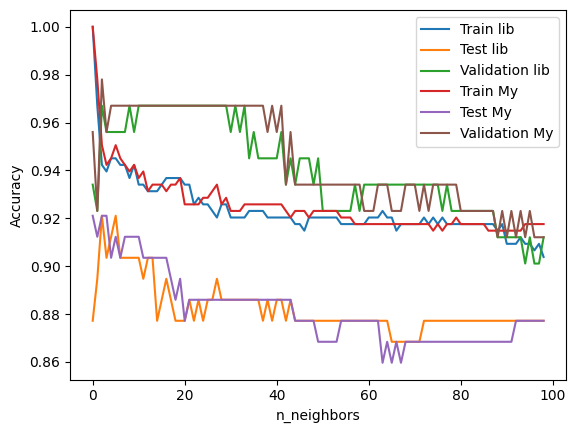

In [77]:
from matplotlib import pyplot as plt


def accuracy_my_knn(n_neighbors, X, y):
    return accuracy(
        KNNClassifier(
            window_size=n_neighbors,
            window_type='mutable',
            kernel='triangular',
            metric='manhattan'
        ).fit(X_train, y_train).predict(X),
        y.to_list()
    )


def accuracy_lib_knn(n_neighbors, X, y):
    return accuracy(
        KNeighborsClassifier(
            n_neighbors=n_neighbors,
            weights='uniform',
            algorithm='ball_tree',
        ).fit(X_train, y_train).predict(X),
        y.to_list()
    )


lib_train_accuracies = []
lib_test_accuracies = []
lib_val_accuracies = []
my_train_accuracies = []
my_test_accuracies = []
my_val_accuracies = []

for k in range(1, 100):
    lib_train_accuracies.append(accuracy_lib_knn(k, X_train, y_train))
    lib_test_accuracies.append(accuracy_lib_knn(k, X_test, y_test))
    lib_val_accuracies.append(accuracy_lib_knn(k, X_val, y_val))

    my_train_accuracies.append(accuracy_my_knn(k, X_train, y_train))
    my_test_accuracies.append(accuracy_my_knn(k, X_test, y_test))
    my_val_accuracies.append(accuracy_my_knn(k, X_val, y_val))

plt.plot(lib_train_accuracies, label='Train lib')
plt.plot(lib_test_accuracies, label='Test lib')
plt.plot(lib_val_accuracies, label='Validation lib')
plt.plot(my_train_accuracies, label='Train My')
plt.plot(my_test_accuracies, label='Test My')
plt.plot(my_val_accuracies, label='Validation My')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

### Anomaly searching

In [78]:
import numpy as np


def lowess_weights(_X, _y, knn, kernel=None):
    if kernel is None:
        kernel = lambda x: 1 if -1 < x < 1 else 0
    _X = _X.to_numpy()
    _y = _y.to_numpy()
    weights = []
    for i in range(len(_X)):
        new_y = knn.fit(np.delete(_X, i, axis=0), np.delete(_y, i, axis=0)).predict(np.array([_X[i]]))[0]
        
        weights.append(kernel(0 if _y[i] == new_y else 1))
    
    return weights

In [80]:
prior_weights = lowess_weights(X_train, y_train, KNeighborsClassifier(n_neighbors=3))

accuracy(
        KNNClassifier(
            window_size=6,
            window_type='mutable',
            kernel='gaussian',
            metric='manhattan',
            weight=prior_weights
        ).fit(X_train, y_train).predict(X_val),
        y.to_list()
)

0.4175824175824176